In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.special import expi
from scipy.stats import nbinom

In [171]:
def get_lc_squared(sigma,s):
    return sigma**2/s

def get_EP(mu,s):
    return mu/s

def get_EPsquared(mu,s,rho,sigma,u2):
    lcs = get_lc_squared(sigma,s)
    return (2*mu/(s**2*rho*lcs))*u2+mu**2/s**2

def u2_exact(w):
    return (-1*np.exp(w**2/(4*np.pi**2))/(8*np.pi))*expi(-1*w**2/(4*np.pi**2))

def get_nb_pmf_theory(x,theta,gamma,n):
    return nbinom.pmf(x,theta,gamma/(gamma+n))

def get_theta(w,sigma,s,mu,rho):
    w_tilde = w / np.sqrt(get_lc_squared(sigma, s))
    theory_u2 = u2_exact(w_tilde)
    EP = get_EP(mu, s)
    EP_sq = get_EPsquared(mu, s, rho, sigma, theory_u2)
    theta = EP ** 2 / (EP_sq - EP ** 2)
    return theta
    
def get_gamma(w,sigma,s,mu,rho):
    w_tilde = w / np.sqrt(get_lc_squared(sigma, s))
    theory_u2 = u2_exact(w_tilde)
    EP = get_EP(mu, s)
    EP_sq = get_EPsquared(mu, s, rho, sigma, theory_u2)
    gamma = EP / (EP_sq - EP ** 2)
    return gamma

def allele_freq(w,sigma,s,mu,rho,n):
    theta = get_theta(w,sigma,s,mu,rho)
    gamma = get_gamma(w,sigma,s,mu,rho)
    return theta/gamma

def variance_freq(w,sigma,s,mu,rho,n):
    theta = get_theta(w,sigma,s,mu,rho)
    gamma = get_gamma(w,sigma,s,mu,rho)
    return nbinom.var(theta,gamma/(gamma+n))
    
def segsites(w,sigma,s,mu,rho,n):
    theta = get_theta(w,sigma,s,mu,rho)
    gamma = get_gamma(w,sigma,s,mu,rho)
    return 1-nbinom.pmf(0,theta,gamma/(gamma+n))

def get_second_moment_all(w,sigma,s,mu,rho):
    w_tilde = w / np.sqrt(get_lc_squared(sigma, s))
    theory_u2 = u2_exact(w_tilde)
    EP_sq = get_EPsquared(mu, s, rho, sigma, theory_u2)
    return EP_sq
   

In [113]:
color_palette_original = [
    "#003f5c",
    "#2f4b7c",
    "#665191",
    "#a05195",
    "#d45087",
    "#f95d6a",
    "#ff7c43",
    "#ffa600"
]
blue_shades = ["#0047AB", "#357ABD", "#7FAEE1"]

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['figure.figsize'] = [8.0,6.0]

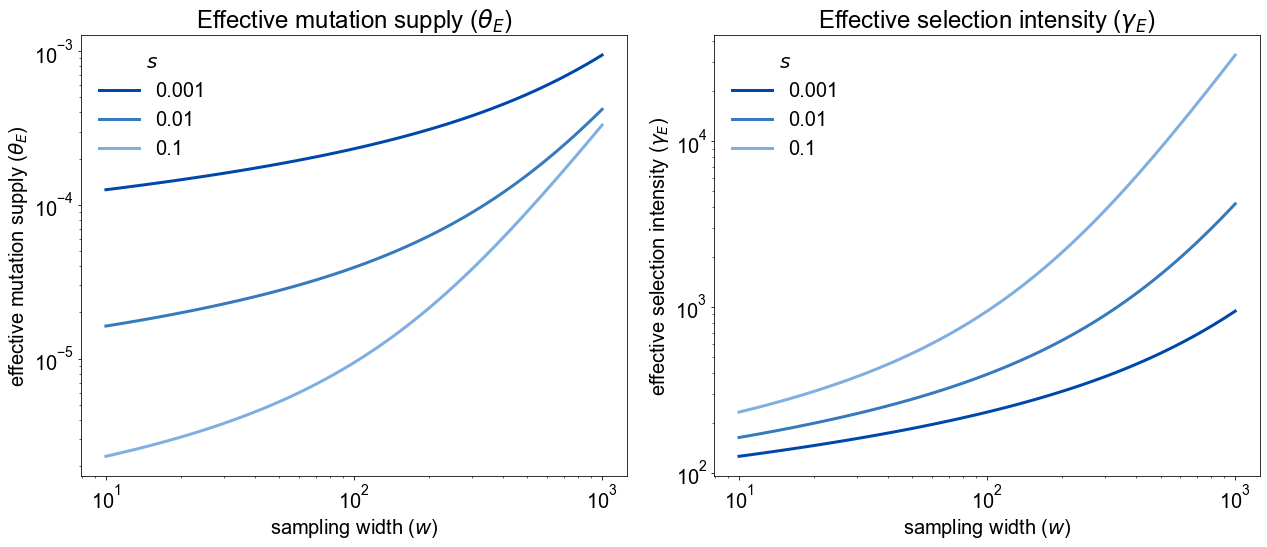

In [120]:
w_range = np.logspace(1,3,100)
dim = 2
rho = 1
L = 10000
N = rho*L**2
sigma = 10
mu = 1e-9
s_vals = [0.001, 0.01, 0.1]
fig,ax = plt.subplots(1,2,figsize=(18,8))
ax[0].plot(w_range,[get_theta(w,sigma,s_vals[0],mu,rho) for w in w_range], color=blue_shades[0])
ax[0].plot(w_range,[get_theta(w,sigma,s_vals[1],mu,rho) for w in w_range], color=blue_shades[1])
ax[0].plot(w_range,[get_theta(w,sigma,s_vals[2],mu,rho) for w in w_range], color=blue_shades[2])
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel(r"sampling width ($w$)") 
ax[0].set_ylabel(r"effective mutation supply ($\theta_E$)")
ax[0].legend(title=r"$s$",frameon=False,labels=['0.001', '0.01', '0.1'],loc='best')
ax[0].set_title(r"Effective mutation supply ($\theta_E$)")

ax[1].plot(w_range,[get_gamma(w,sigma,s_vals[0],mu,rho) for w in w_range], color=blue_shades[0])
ax[1].plot(w_range,[get_gamma(w,sigma,s_vals[1],mu,rho) for w in w_range], color=blue_shades[1])
ax[1].plot(w_range,[get_gamma(w,sigma,s_vals[2],mu,rho) for w in w_range], color=blue_shades[2])
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_ylabel(r"effective selection intensity ($\gamma_E$)")
ax[1].set_xlabel(r"sampling width ($w$)") 
ax[1].set_title(r"Effective selection intensity ($\gamma_E$)")
ax[1].legend(title=r"$s$",frameon=False,labels=['0.001', '0.01', '0.1'])
# plt.show()
plt.tight_layout()
plt.savefig('effective_params.png')

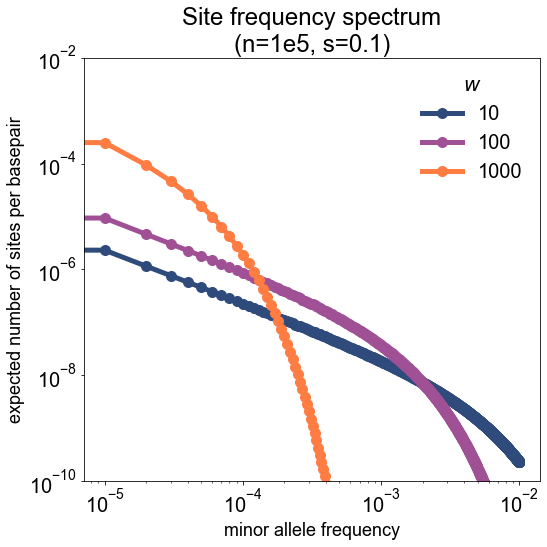

In [121]:
fig, ax = plt.subplots(figsize=(8,8))

plt.rcParams['font.size'] =20
plt.rcParams['lines.linewidth'] = 3

nval=100000
kmax=1000
step=1
w_vals_plot = [10,100,1000]
sval=0.1
theta0 = get_theta(w_vals_plot[0],sigma,sval,mu,rho)
theta1 = get_theta(w_vals_plot[1],sigma,sval,mu,rho)
theta2 = get_theta(w_vals_plot[2],sigma,sval,mu,rho)
gamma0 = get_gamma(w_vals_plot[0],sigma,sval,mu,rho)
gamma1 = get_gamma(w_vals_plot[1],sigma,sval,mu,rho)
gamma2 = get_gamma(w_vals_plot[2],sigma,sval,mu,rho)

sfs_w0 = [get_nb_pmf_theory(k,theta0,gamma0,nval) for k in range(0,kmax,step)]
sfs_w1 = [get_nb_pmf_theory(k,theta1,gamma1,nval) for k in range(0,kmax,step)]
sfs_w2 = [get_nb_pmf_theory(k,theta2,gamma2,nval) for k in range(0,kmax,step)]
ax.plot([x/nval for x in range(0,kmax,step)],sfs_w0,label=str(w_vals_plot[0]),marker='o',color=color_palette_original[1],linewidth=5,markersize=10)
ax.plot([x/nval for x in range(0,kmax,step)],sfs_w1,label=str(w_vals_plot[1]),marker='o',color=color_palette_original[3],linewidth=5,markersize=10)
ax.plot([x/nval for x in range(0,kmax,step)],sfs_w2,label=str(w_vals_plot[2]),marker='o',color=color_palette_original[6],linewidth=5,markersize=10)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-10,1e-2)
ax.set_title("Site frequency spectrum\n(n=1e5, s="+str(sval)+")")
# ax4.set_xlabel("minor allele count (k)")
ax.set_xlabel("minor allele frequency",fontsize=18)
ax.set_ylabel("expected number of sites per basepair",fontsize=18)
ax.legend(title=r"$w$",frameon=False)
# plt.show()
plt.tight_layout()
plt.savefig('theory_sfs.png')

<ipython-input-122-b1b0504e74a9>:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


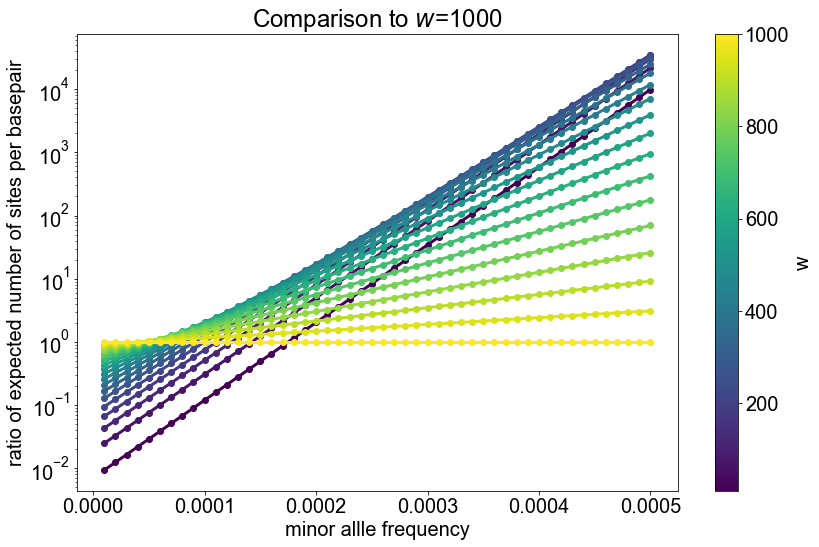

In [122]:
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as ticker
w_list = np.linspace(1,100,20)
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(w_list))]

fig, ax = plt.subplots(figsize=(12,8))

kmax = 51

sval=0.1

w_list = np.linspace(1e1,1e3,20)
# w_list = np.logspace(0,2,20)

theta0 = get_theta(1000,sigma,sval,mu,rho)
gamma0 = get_gamma(1000,sigma,sval,mu,rho)
sfs_broad = [get_nb_pmf_theory(k,theta0,gamma0,nval) for k in range(0,kmax,step)]

for w, color in zip(w_list, colors):
    theta = get_theta(w,sigma,sval,mu,rho)
    gamma = get_gamma(w,sigma,sval,mu,rho)
    sfs_temp = [get_nb_pmf_theory(k,theta,gamma,nval) for k in range(0,kmax,step)]
    ratio = [a/b for a,b in zip(sfs_temp,sfs_broad)]
    ax.plot([x/nval for x in range(1,kmax,step)],ratio[1:],color=color,marker='o')
#     ax.legend()
# ax.set_ylim(1e-1,1e1)
ax.set_yscale('log')
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(w_list), vmax=max(w_list)))
sm.set_array([])  # Set an empty array
cbar = plt.colorbar(sm)
cbar.set_label('w')
    
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.set_xlabel('minor allle frequency')
ax.set_ylabel('ratio of expected number of sites per basepair')
ax.set_title("Comparison to $w$=1000")
# plt.show()
plt.tight_layout()
plt.savefig('sfs_comp.png')

In [106]:
allele_freq(1000,sigma,sval,mu,rho,nval)

1.0000000000000002e-08

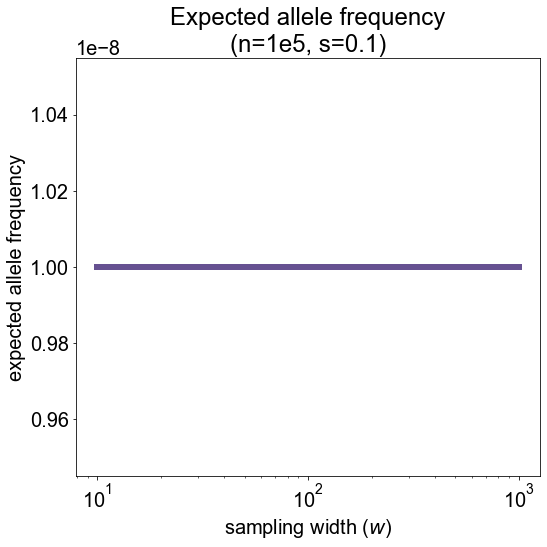

In [124]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(w_range,[allele_freq(w,sigma,sval,mu,rho,nval) for w in w_range],color=color_palette_original[2],linewidth=6)
ax.set_xscale("log")
ax.set_xlabel(r"sampling width ($w$)") 
ax.set_ylabel(r"expected allele frequency")
# ax.set_xticks([1e-1,1e0,1e1,1e2])
ax.set_title("Expected allele frequency\n(n=1e5, s="+str(sval)+")")
# plt.show()
plt.tight_layout()
plt.savefig('exp_freq.png')

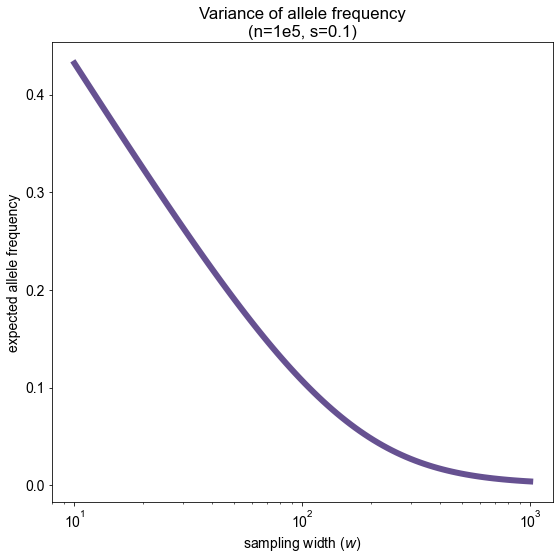

In [172]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(w_range,[variance_freq(w,sigma,sval,mu,rho,nval) for w in w_range],color=color_palette_original[2],linewidth=6)
ax.set_xscale("log")
ax.set_xlabel(r"sampling width ($w$)") 
ax.set_ylabel(r"expected allele frequency")
# ax.set_xticks([1e-1,1e0,1e1,1e2])
ax.set_title("Variance of allele frequency\n(n=1e5, s="+str(sval)+")")
# plt.show()
plt.tight_layout()
# plt.savefig('exp_freq.png')
plt.show()

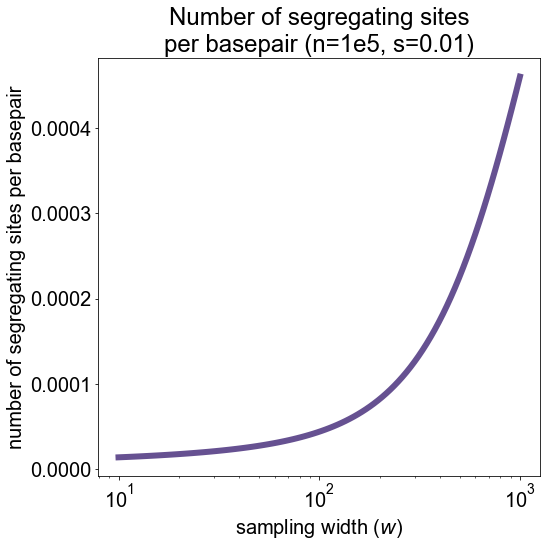

In [127]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(w_range,[segsites(w,sigma,sval,mu,rho,nval) for w in w_range],color=color_palette_original[2],linewidth=6)
ax.set_xscale("log")
ax.set_xlabel(r"sampling width ($w$)") 
ax.set_ylabel(r"number of segregating sites per basepair")
ax.set_title("Number of segregating sites\nper basepair (n=1e5, s="+str(s_vals[1])+")")
# plt.show()
plt.tight_layout()
plt.savefig('segsites.png')

In [173]:
def get_zs(s,beta,Vp,n,a=1e-8):
    vs = 2*erfinv(1-a)**2
    return(0.5 - (0.5)*math.sqrt(1-(2*vs*(Vp/n))/((beta)**2)))
    
def get_etaell(w,sigma,s,mu,rho,n,beta):
    theta = get_theta(w,sigma,s,mu,rho)
    gamma = get_gamma(w,sigma,s,mu,rho)
    xstar = get_zs(s,beta,1,n,a=1e-8)
    upper_lim = math.floor(n*xstar)
    sum_total = 0
    for i in range(upper_lim+1):
        sum_total+=get_nb_pmf_theory(i,theta,gamma,n)
    return 1 - sum_total
    
def burden_ncp(s,w,sigma,rho,
               gamma=2,prop_cases=0.5,num_snps=100,num_assoc=100,N=1000,D=1,d=2,mu=1e-9,n=1e5):
    
    # calc mean and variance
    num_cases = math.floor(prop_cases*n) # round to integer
    num_controls = n-num_cases
    mean = allele_freq(w,sigma,s,mu,rho,n)
    var = variance_freq(w,sigma,s,mu,rho,n)
    ncp = np.sqrt((2*num_cases*num_controls)/(num_cases+num_controls))*(num_assoc/np.sqrt(num_snps))*(mean/(np.sqrt(var+mean-mean**2)))*(gamma-1)
    return ncp

def power_from_ncp(ncp,alpha,df=1):
    power = 1 - stats.ncx2.cdf(stats.chi2.ppf(1 - alpha, df=1), df=1, nc=ncp)
    return power

def power_all_burden(s,w,sigma,rho,gamma=2,prop_cases=0.1,num_snps=100,num_assoc=100,
             N=10000,n=1e5,mu=1e-9,d=2,D=1,alpha=5e-8,df=1):
    ncp_temp = burden_ncp(s,w,sigma,rho,gamma=gamma,prop_cases=prop_cases,
                         num_snps=num_snps,num_assoc=num_assoc,N=N,n=n,mu=mu,d=d,D=D)
    power_temp = power_from_ncp(ncp_temp,alpha,df)
    return power_temp

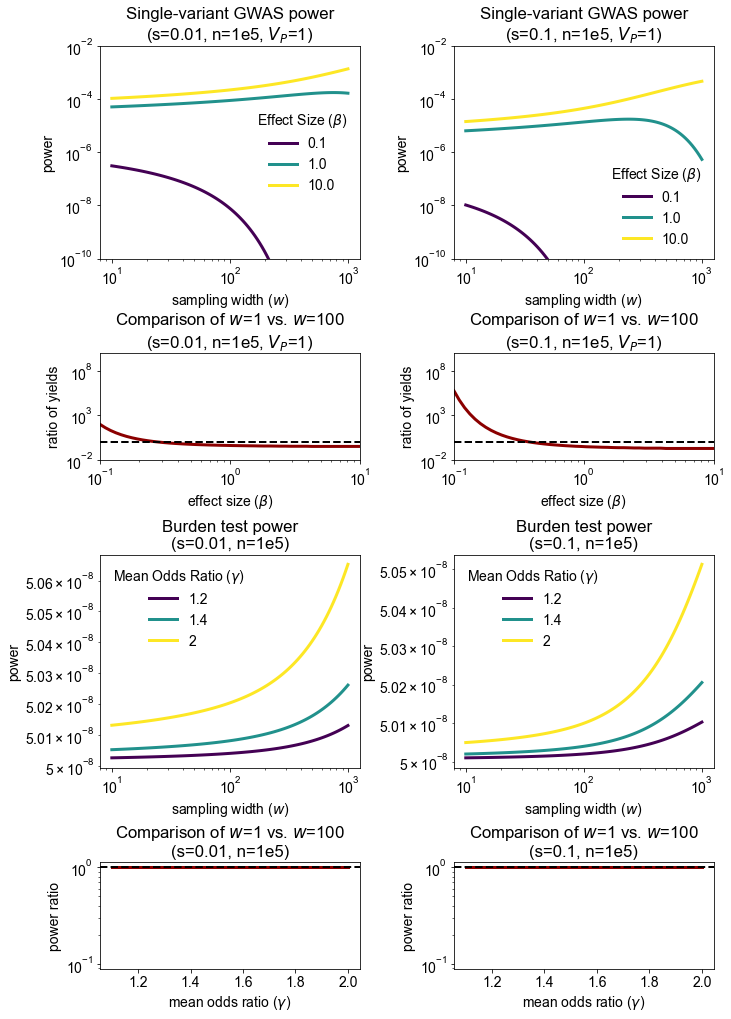

In [178]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from matplotlib import gridspec
from scipy.special import erfinv
import math
from scipy import stats

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(10, 14))
gs = gridspec.GridSpec(4, 2, height_ratios=[2, 1, 2,1 ])  
w_range = np.logspace(1,3,100)
axs = [
    [fig.add_subplot(gs[0, j]) for j in range(2)],
    [fig.add_subplot(gs[1, j]) for j in range(2)],
    [fig.add_subplot(gs[2, j]) for j in range(2)],
    [fig.add_subplot(gs[3, j]) for j in range(2)]
]

num_b=3

b_list = np.logspace(-1,1,num_b)
colors = plt.cm.viridis(np.linspace(0,1,num_b))

L = 1000
n = 100000
s1 = 0.01
s2 = 0.1

w1 = 1
w2 = 100

# top left

for i in range(num_b):
    axs[0][0].loglog(w_range,[get_etaell(w,sigma,s1,mu,rho,n,b_list[i]) for w in w_range],color=colors[i],label=str(round(b_list[i],2)))

axs[0][0].legend(title=r"Effect Size ($\beta$)",frameon=False,title_fontsize=14)
axs[0][0].set_xlabel(r"sampling width ($w$)")
axs[0][0].set_ylabel("power")
axs[0][0].set_title("Single-variant GWAS power\n(s="+str(s1)+r", n=1e5, $V_P$=1)")
axs[0][0].set_ylim(1e-10,1e-2)
    
# top right

for i in range(num_b):
    axs[0][1].loglog(w_range,[get_etaell(w,sigma,s2,mu,rho,n,b_list[i]) for w in w_range],color=colors[i],label=str(round(b_list[i],2)))

axs[0][1].legend(title=r"Effect Size ($\beta$)",frameon=False,title_fontsize=14)
axs[0][1].set_xlabel(r"sampling width ($w$)")
axs[0][1].set_ylabel("power")
axs[0][1].set_title("Single-variant GWAS power\n(s="+str(s2)+r", n=1e5, $V_P$=1)")
axs[0][1].set_ylim(1e-10,1e-2)
    
# 2nd row left

b_list_2 = np.logspace(-1,1,50)
axs[1][0].loglog(b_list_2,[get_etaell(w1,sigma,s1,mu,rho,n,b_temp)/get_etaell(w2,sigma,s1,mu,rho,n,b_temp) for b_temp in b_list_2],
                color='darkred')
axs[1][0].axhline(y=1, color='black', linestyle='--',linewidth=2)
axs[1][0].set_ylim(1e-2,1e10)
axs[1][0].set_xlim(1e-1,1e1)
locator = LogLocator(numticks=2)
axs[1][0].set_xlabel(r"effect size ($\beta$)")
axs[1][0].set_ylabel("ratio of yields")# of yields (narrow/broad)")
axs[1][0].set_title("Comparison of $w$="+str(w1)+r" vs. $w$="+str(w2)+"\n(s="+str(s1)+r", n=1e5, $V_P$=1)")

# 2nd row right

axs[1][1].loglog(b_list_2,[get_etaell(w1,sigma,s2,mu,rho,n,b_temp)/get_etaell(w2,sigma,s2,mu,rho,n,b_temp) for b_temp in b_list_2],color='darkred')
axs[1][1].axhline(y=1, color='black', linestyle='--',linewidth=2)  
axs[1][1].set_ylim(1e-2,1e10)
axs[1][1].set_xlim(1e-1,1e1)
axs[1][1].set_xlabel(r"effect size ($\beta$)")
axs[1][1].set_ylabel("ratio of yields")# of yields (narrow/broad)")
axs[1][1].set_title("Comparison of $w$="+str(w1)+r" vs. $w$="+str(w2)+"\n(s="+str(s2)+r", n=1e5, $V_P$=1)")

# 3rd row left

ccratio=1e-3
g_list = [1.2,1.4,2]
g_list_2 = np.linspace(1.1,2,30)

for i in range(num_b):
    axs[2][0].loglog(w_range,[power_all_burden(s1,w,sigma,rho,gamma=g_list[i],n=n,num_snps=L,num_assoc=L)
                for w in w_range],color=colors[i],label=str(round(g_list[i],2)))

axs[2][0].set_xlabel(r"sampling width ($w$)")
axs[2][0].set_ylabel(r"power")
axs[2][0].set_title("Burden test power\n(s="+str(s1)+", n=1e5)")
# axs[2][0].set_ylim(1e-8,1.5)
axs[2][0].legend(title=r"Mean Odds Ratio ($\gamma$)",frameon=False,title_fontsize=14)

# 3rd row right


for i in range(num_b):
    axs[2][1].loglog(w_range,[power_all_burden(s2,w,sigma,rho,gamma=g_list[i],n=n,num_snps=L,num_assoc=L)
                for w in w_range],color=colors[i],label=str(round(g_list[i],2)))

axs[2][1].legend(title=r"Mean Odds Ratio ($\gamma$)",frameon=False,title_fontsize=14)
axs[2][1].set_xlabel(r"sampling width ($w$)")
axs[2][1].set_ylabel(r"power")
axs[2][1].set_title("Burden test power\n(s="+str(s2)+", n=1e5)")
# axs[2][1].set_ylim(1e-8,1.5)    
   
    
# bottom left
axs[3][0].plot(g_list_2,[power_all_burden(s1,w1,sigma,rho,gamma=g_list[i],n=n,num_snps=L,num_assoc=L)/
                           power_all_burden(s1,w2,sigma,rho,gamma=g_list[i],n=n,num_snps=L,num_assoc=L) for gt in g_list_2],
              color='darkred')
axs[3][0].set_yscale('log')
axs[3][0].axhline(y=1, color='black', linestyle='--',linewidth=2)
# axs[3][0].set_ylim(1e-1,1.5)
axs[3][0].set_title("Comparison of $w$="+str(w1)+r" vs. $w$="+str(w2)+"\n(s="+str(s1)+r", n=1e5)")
axs[3][0].set_ylabel("power ratio")
axs[3][0].set_xlabel(r"mean odds ratio ($\gamma$)")

# bottom right
axs[3][1].plot(g_list_2,[power_all_burden(s2,w1,sigma,rho,gamma=g_list[i],n=n,num_snps=L,num_assoc=L)/
                           power_all_burden(s2,w2,sigma,rho,gamma=g_list[i],n=n,num_snps=L,num_assoc=L) for gt in g_list_2],
              color='darkred')
axs[3][1].set_yscale('log')
axs[3][1].axhline(y=1, color='black', linestyle='--',linewidth=2)
# axs[3][1].set_ylim(1e-1,1.5)
axs[3][1].set_title("Comparison of $w$="+str(w1)+r" vs. $w$="+str(w2)+"\n(s="+str(s2)+r", n=1e5)")
axs[3][1].set_ylabel("power ratio")
axs[3][1].set_xlabel(r"mean odds ratio ($\gamma$)")


plt.tight_layout(pad=0.1)
plt.savefig("power_fig.png")


# plt.show()
#